Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

Defining Functions

In [ ]:
# Assuming df is your existing DataFrame
df = pd.DataFrame(columns=['Time', 'CGM', 'CHO', 'insulin', 'Risk', 'date', 'time'])

def appendData(link, df):
    df1 = pd.read_csv(link)
    df1.drop(['BG', 'LBGI', 'HBGI'], axis=1, inplace=True)
    df1['Time'] = pd.to_datetime(df1['Time'])
    df1['date'] = df1['Time'].dt.date
    df1['time'] = df1['Time'].dt.time

    # Append df1 data to df in place
    df = pd.concat([df, df1], ignore_index=True)
    return df


# List of file paths
link = ['/content/adolescent#001.csv',
        '/content/adolescent#004.csv',
         '/content/adult#001.csv',
        '/content/adult#005.csv',
        '/content/adult#008.csv',
        '/content/child#001.csv',
        '/content/child#010.csv',
        ]


# Apply the function to each file path
for file_path in link:
    df = appendData(file_path, df)

# Save the final DataFrame to a new CSV file
df.to_csv('output_file.csv', index=False)


Reading File

In [ ]:
df1=pd.read_csv('/content/output_file.csv')

In [ ]:
df1

,Time,CGM,CHO,insulin,Risk,date,time
0,2023-10-25 06:00:00,136.435033,0.0,0.013933,0.446600,2023-10-25,06:00:00
1,2023-10-25 06:05:00,137.121412,0.0,0.013933,0.483302,2023-10-25,06:05:00
2,2023-10-25 06:10:00,138.398018,0.0,0.013933,0.520644,2023-10-25,06:10:00
3,2023-10-25 06:15:00,140.060899,0.0,0.013933,0.558542,2023-10-25,06:15:00
4,2023-10-25 06:20:00,141.830932,0.0,0.013933,0.596914,2023-10-25,06:20:00
...,...,...,...,...,...,...,...
10075,2023-10-30 05:35:00,113.361990,0.0,0.006625,0.055911,2023-10-30,05:35:00
10076,2023-10-30 05:40:00,114.071279,0.0,0.006625,0.066871,2023-10-30,05:40:00
10077,2023-10-30 05:45:00,114.666332,0.0,0.006625,0.078525,2023-10-30,05:45:00
10078,2023-10-30 05:50:00,115.140354,0.0,0.006625,0.090813,2023-10-30,05:50:00


Preprocessing

In [ ]:
df1.describe()

,CGM,CHO,insulin,Risk
count,10080.000000,10080.000000,10080.000000,1.008000e+04
mean,117.839908,0.132579,0.027274,1.010623e+01
std,58.236959,1.322684,0.147707,2.046456e+01
min,39.000000,0.000000,0.006575,2.076944e-07
25%,76.670834,0.000000,0.006625,6.671935e-01
50%,107.414112,0.000000,0.014558,3.368180e+00
75%,142.682911,0.000000,0.019667,1.073738e+01
max,384.106087,20.600000,4.139667,2.459567e+02


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     10080 non-null  object 
 1   CGM      10080 non-null  float64
 2   CHO      10080 non-null  float64
 3   insulin  10080 non-null  float64
 4   Risk     10080 non-null  float64
 5   date     10080 non-null  object 
 6   time     10080 non-null  object 
dtypes: float64(4), object(3)
memory usage: 551.4+ KB


In [ ]:
df1.groupby('time')['CGM'].count()


time
00:00:00    35
00:05:00    35
00:10:00    35
00:15:00    35
00:20:00    35
            ..
23:35:00    35
23:40:00    35
23:45:00    35
23:50:00    35
23:55:00    35
Name: CGM, Length: 288, dtype: int64

In [ ]:
df1.isnull().sum()

Time       0
CGM        0
CHO        0
insulin    0
Risk       0
date       0
time       0
dtype: int64

In [ ]:
df1['CGM'] = df1['CGM'].round(2)
df1['CHO'] = df1['CHO'].round(2)
df1['insulin'] = df1['insulin'].round(2)
df1['Risk'] = df1['Risk'].round(2)

In [ ]:
df1

,Time,CGM,CHO,insulin,Risk,date,time
0,2023-10-25 06:00:00,136.44,0.0,0.01,0.45,2023-10-25,06:00:00
1,2023-10-25 06:05:00,137.12,0.0,0.01,0.48,2023-10-25,06:05:00
2,2023-10-25 06:10:00,138.40,0.0,0.01,0.52,2023-10-25,06:10:00
3,2023-10-25 06:15:00,140.06,0.0,0.01,0.56,2023-10-25,06:15:00
4,2023-10-25 06:20:00,141.83,0.0,0.01,0.60,2023-10-25,06:20:00
...,...,...,...,...,...,...,...
10075,2023-10-30 05:35:00,113.36,0.0,0.01,0.06,2023-10-30,05:35:00
10076,2023-10-30 05:40:00,114.07,0.0,0.01,0.07,2023-10-30,05:40:00
10077,2023-10-30 05:45:00,114.67,0.0,0.01,0.08,2023-10-30,05:45:00
10078,2023-10-30 05:50:00,115.14,0.0,0.01,0.09,2023-10-30,05:50:00


In [ ]:
features = ['CGM', 'CHO', 'insulin']

# Create a time lag feature for each input variable
interval = 2  # 2-hour intervals
look_back = 24 // interval  # Number of time steps in the past 24 hours

for feature in features:
    for i in range(1, look_back + 1):
        df[f'{feature}_lag_{i}'] = df1[feature].shift(i * (60 // interval))  # Convert hours to minutes

# Drop rows with NaN values resulting from the lag
df.dropna(inplace=True)


In [ ]:
# Select features and labels, including additional features
additional_features =['CGM', 'CHO', 'insulin']  # Add your additional features here

X_lag = df[[f'{feature}_lag_{i}' for feature in features for i in range(1, look_back + 1)]]
X_additional = df[additional_features]

# Concatenate lag features and additional features
train= pd.concat([X_lag, X_additional], axis=1)

train

,CGM_lag_1,CGM_lag_2,CGM_lag_3,CGM_lag_4,CGM_lag_5,CGM_lag_6,CGM_lag_7,CGM_lag_8,CGM_lag_9,CGM_lag_10,...,insulin_lag_6,insulin_lag_7,insulin_lag_8,insulin_lag_9,insulin_lag_10,insulin_lag_11,insulin_lag_12,CGM,CHO,insulin
360,144.05,133.20,128.04,114.09,90.57,110.36,97.71,69.01,110.76,112.61,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,143.445893,0.0,0.013933
361,139.30,136.60,128.52,114.51,89.03,109.79,101.75,68.94,110.21,115.76,...,0.01,0.01,0.01,0.01,1.40,0.01,0.01,141.890177,0.0,0.013933
362,137.18,139.36,128.02,114.00,92.71,109.05,106.36,69.11,109.80,113.11,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,143.455036,0.0,0.013933
363,137.30,141.53,126.93,112.83,95.45,108.15,111.38,69.44,109.39,110.65,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,143.987147,0.0,0.013933
364,139.01,143.24,125.72,111.38,97.42,107.10,116.60,69.87,108.83,108.53,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,143.649623,0.0,0.013933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,41.57,72.83,58.22,183.15,93.35,121.41,44.16,154.77,121.27,111.62,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,113.361990,0.0,0.006625
10076,41.68,75.43,59.31,170.38,91.24,112.73,44.58,147.70,130.38,112.17,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,114.071279,0.0,0.006625
10077,43.26,78.86,59.19,158.69,90.01,105.28,49.07,140.88,145.45,112.50,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,114.666332,0.0,0.006625
10078,46.59,82.68,58.26,147.92,89.66,99.33,59.69,134.32,165.75,112.70,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,115.140354,0.0,0.006625


In [ ]:
# hyperglycaemic
train['target'] = train['CGM'].apply(lambda x: 1 if x > 180 else 0)
train.head(5)

,CGM_lag_1,CGM_lag_2,CGM_lag_3,CGM_lag_4,CGM_lag_5,CGM_lag_6,CGM_lag_7,CGM_lag_8,CGM_lag_9,CGM_lag_10,...,insulin_lag_7,insulin_lag_8,insulin_lag_9,insulin_lag_10,insulin_lag_11,insulin_lag_12,CGM,CHO,insulin,target
360,144.05,133.20,128.04,114.09,90.57,110.36,97.71,69.01,110.76,112.61,...,0.01,0.01,0.01,0.01,0.01,0.01,143.445893,0.0,0.013933,0
361,139.30,136.60,128.52,114.51,89.03,109.79,101.75,68.94,110.21,115.76,...,0.01,0.01,0.01,1.40,0.01,0.01,141.890177,0.0,0.013933,0
362,137.18,139.36,128.02,114.00,92.71,109.05,106.36,69.11,109.80,113.11,...,0.01,0.01,0.01,0.01,0.01,0.01,143.455036,0.0,0.013933,0
363,137.30,141.53,126.93,112.83,95.45,108.15,111.38,69.44,109.39,110.65,...,0.01,0.01,0.01,0.01,0.01,0.01,143.987147,0.0,0.013933,0
364,139.01,143.24,125.72,111.38,97.42,107.10,116.60,69.87,108.83,108.53,...,0.01,0.01,0.01,0.01,0.01,0.01,143.649623,0.0,0.013933,0


In [ ]:
train[train['target']==0]

,CGM_lag_1,CGM_lag_2,CGM_lag_3,CGM_lag_4,CGM_lag_5,CGM_lag_6,CGM_lag_7,CGM_lag_8,CGM_lag_9,CGM_lag_10,...,insulin_lag_7,insulin_lag_8,insulin_lag_9,insulin_lag_10,insulin_lag_11,insulin_lag_12,CGM,CHO,insulin,target
360,144.05,133.20,128.04,114.09,90.57,110.36,97.71,69.01,110.76,112.61,...,0.01,0.01,0.01,0.01,0.01,0.01,143.445893,0.0,0.013933,0
361,139.30,136.60,128.52,114.51,89.03,109.79,101.75,68.94,110.21,115.76,...,0.01,0.01,0.01,1.40,0.01,0.01,141.890177,0.0,0.013933,0
362,137.18,139.36,128.02,114.00,92.71,109.05,106.36,69.11,109.80,113.11,...,0.01,0.01,0.01,0.01,0.01,0.01,143.455036,0.0,0.013933,0
363,137.30,141.53,126.93,112.83,95.45,108.15,111.38,69.44,109.39,110.65,...,0.01,0.01,0.01,0.01,0.01,0.01,143.987147,0.0,0.013933,0
364,139.01,143.24,125.72,111.38,97.42,107.10,116.60,69.87,108.83,108.53,...,0.01,0.01,0.01,0.01,0.01,0.01,143.649623,0.0,0.013933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,41.57,72.83,58.22,183.15,93.35,121.41,44.16,154.77,121.27,111.62,...,0.01,0.01,0.01,0.01,0.01,0.01,113.361990,0.0,0.006625,0
10076,41.68,75.43,59.31,170.38,91.24,112.73,44.58,147.70,130.38,112.17,...,0.01,0.01,0.01,0.01,0.01,0.01,114.071279,0.0,0.006625,0
10077,43.26,78.86,59.19,158.69,90.01,105.28,49.07,140.88,145.45,112.50,...,0.01,0.01,0.01,0.01,0.01,0.01,114.666332,0.0,0.006625,0
10078,46.59,82.68,58.26,147.92,89.66,99.33,59.69,134.32,165.75,112.70,...,0.01,0.01,0.01,0.01,0.01,0.01,115.140354,0.0,0.006625,0


In [ ]:
import numpy as np
# Define your condition for dropping rows
condition = train['target'] == 0

# Get the indices of rows that satisfy the condition
rows_to_drop = train[condition].index

# Randomly select a subset of rows to drop
percentage_to_drop = 70
num_rows_to_drop = int(len(rows_to_drop) * (percentage_to_drop / 100))
rows_to_drop = np.random.choice(rows_to_drop, size=num_rows_to_drop, replace=False)

# Drop the selected rows
train = train.drop(rows_to_drop)

In [ ]:
train[train['target']==0]


,CGM_lag_1,CGM_lag_2,CGM_lag_3,CGM_lag_4,CGM_lag_5,CGM_lag_6,CGM_lag_7,CGM_lag_8,CGM_lag_9,CGM_lag_10,...,insulin_lag_6,insulin_lag_7,insulin_lag_8,insulin_lag_9,insulin_lag_10,insulin_lag_11,insulin_lag_12,CHO,insulin,target
362,137.18,139.36,128.02,114.00,92.71,109.05,106.36,69.11,109.80,113.11,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.013933,0
365,141.64,144.60,124.89,109.99,98.79,105.91,121.82,70.34,107.99,106.90,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.013933,0
372,153.03,150.33,129.76,112.58,105.23,98.65,143.94,73.98,96.05,115.92,...,0.01,0.01,0.01,0.01,0.01,0.51,0.01,0.0,0.013933,0
379,131.42,151.48,127.88,113.89,104.06,90.95,132.69,75.30,87.88,137.15,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.013933,0
399,135.32,151.45,148.76,129.14,109.47,101.57,100.64,139.33,71.91,100.85,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1.6,0.013933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,72.62,67.00,321.95,77.59,261.23,104.33,312.04,111.03,94.43,58.99,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.006625,0
10042,70.61,51.99,229.31,97.71,151.58,49.36,179.32,115.43,109.37,81.24,...,0.01,0.35,0.65,0.01,0.01,0.01,0.01,0.0,0.006625,0
10047,78.86,59.19,158.69,90.01,105.28,49.07,140.88,145.45,112.50,97.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.006625,0
10052,92.08,57.35,109.70,122.30,82.93,152.88,113.73,260.45,114.71,89.73,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.006625,0


In [ ]:
target=train.target
target.count()


2309

In [ ]:
train.columns

Index(['CGM_lag_1', 'CGM_lag_2', 'CGM_lag_3', 'CGM_lag_4', 'CGM_lag_5',
       'CGM_lag_6', 'CGM_lag_7', 'CGM_lag_8', 'CGM_lag_9', 'CGM_lag_10',
       'CGM_lag_11', 'CGM_lag_12', 'CHO_lag_1', 'CHO_lag_2', 'CHO_lag_3',
       'CHO_lag_4', 'CHO_lag_5', 'CHO_lag_6', 'CHO_lag_7', 'CHO_lag_8',
       'CHO_lag_9', 'CHO_lag_10', 'CHO_lag_11', 'CHO_lag_12', 'insulin_lag_1',
       'insulin_lag_2', 'insulin_lag_3', 'insulin_lag_4', 'insulin_lag_5',
       'insulin_lag_6', 'insulin_lag_7', 'insulin_lag_8', 'insulin_lag_9',
       'insulin_lag_10', 'insulin_lag_11', 'insulin_lag_12', 'CHO', 'insulin',
       'target'],
      dtype='object')

In [ ]:
train.drop('CGM', axis=1, inplace=True)

KeyError: ignored

In [ ]:
train.columns

Index(['CGM_lag_1', 'CGM_lag_2', 'CGM_lag_3', 'CGM_lag_4', 'CGM_lag_5',
       'CGM_lag_6', 'CGM_lag_7', 'CGM_lag_8', 'CGM_lag_9', 'CGM_lag_10',
       'CGM_lag_11', 'CGM_lag_12', 'CHO_lag_1', 'CHO_lag_2', 'CHO_lag_3',
       'CHO_lag_4', 'CHO_lag_5', 'CHO_lag_6', 'CHO_lag_7', 'CHO_lag_8',
       'CHO_lag_9', 'CHO_lag_10', 'CHO_lag_11', 'CHO_lag_12', 'insulin_lag_1',
       'insulin_lag_2', 'insulin_lag_3', 'insulin_lag_4', 'insulin_lag_5',
       'insulin_lag_6', 'insulin_lag_7', 'insulin_lag_8', 'insulin_lag_9',
       'insulin_lag_10', 'insulin_lag_11', 'insulin_lag_12', 'CHO', 'insulin',
       'target'],
      dtype='object')

Preparing Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.2,random_state=10)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=2)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))


Accuracy: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       202
           1       1.00      0.92      0.96       260

    accuracy                           0.95       462
   macro avg       0.95      0.96      0.95       462
weighted avg       0.96      0.95      0.95       462



Confusion Matrix

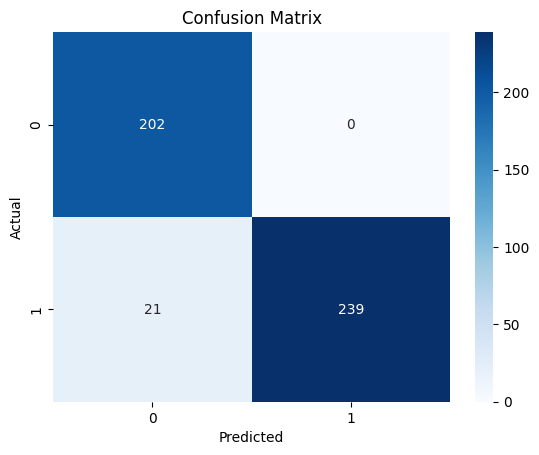

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert regression values to classes (binary or multi-class)
threshold = 0.5  # Adjust the threshold based on your problem
predicted_classes = (predictions > threshold).astype(int)
actual_classes = (y_test > threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()